In [ ]:
#SETUP & IMPORTS

In [ ]:
print("=" * 60)
print("ROOM OCCUPANCY DETECTION - ML MODEL TRAINING")
print("Light-Based Edge AI System")
print("=" * 60)
print()

ROOM OCCUPANCY DETECTION - ML MODEL TRAINING
Light-Based Edge AI System



In [ ]:
# Install required packages
print("[1/8] Installing required packages...")
import sys
!{sys.executable} -m pip install -q scikit-learn pandas numpy matplotlib seaborn
print("✓ Packages installed!")

[1/8] Installing required packages...
✓ Packages installed!


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("✓ Packages installed and imported\n")

✓ Packages installed and imported



In [ ]:
#LOAD DATASET

In [ ]:
print("[2/8] Downloading dataset from UCI Repository...")
print("This takes 30-60 seconds - please wait...")

# Download the zip file containing the data
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

# Extract (unzip) the files
!unzip -q -o occupancy_data.zip

print("✓ Dataset downloaded and extracted!")
print()

[2/8] Downloading dataset from UCI Repository...
This takes 30-60 seconds - please wait...
✓ Dataset downloaded and extracted!



In [ ]:
print("[3/8] Loading data into memory...")

# Load the CSV file into a table (DataFrame)
df = pd.read_csv('datatraining.txt')

print(f"✓ Dataset loaded successfully!")
print(f"  Total samples: {len(df):,}")
print(f"  Columns: {list(df.columns)}")
print()

# Show first 10 rows
print("First 10 rows of data:")
print(df.head(10))
print()

# Show statistics
print("Statistical summary:")
print(df.describe())
print()

[3/8] Loading data into memory...
✓ Dataset loaded successfully!
  Total samples: 8,143
  Columns: ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']

First 10 rows of data:
                   date  Temperature  Humidity  Light         CO2  \
1   2015-02-04 17:51:00       23.180   27.2720  426.0  721.250000   
2   2015-02-04 17:51:59       23.150   27.2675  429.5  714.000000   
3   2015-02-04 17:53:00       23.150   27.2450  426.0  713.500000   
4   2015-02-04 17:54:00       23.150   27.2000  426.0  708.250000   
5   2015-02-04 17:55:00       23.100   27.2000  426.0  704.500000   
6   2015-02-04 17:55:59       23.100   27.2000  419.0  701.000000   
7   2015-02-04 17:57:00       23.100   27.2000  419.0  701.666667   
8   2015-02-04 17:57:59       23.100   27.2000  419.0  699.000000   
9   2015-02-04 17:58:59       23.100   27.2000  419.0  689.333333   
10  2015-02-04 18:00:00       23.075   27.1750  419.0  688.000000   

    HumidityRatio  Occupancy  
1   

In [ ]:
#DATA EXPLORATION

In [ ]:
print("Checking occupancy distribution...")

# Count how many 0s (empty) and 1s (occupied)
print("Occupancy counts:")
print(df['Occupancy'].value_counts())
print()

empty_count = (df['Occupancy'] == 0).sum()
occupied_count = (df['Occupancy'] == 1).sum()
total = len(df)

print(f"Empty (0):    {empty_count:,} samples ({empty_count/total*100:.1f}%)")
print(f"Occupied (1): {occupied_count:,} samples ({occupied_count/total*100:.1f}%)")
print()

Checking occupancy distribution...
Occupancy counts:
Occupancy
0    6414
1    1729
Name: count, dtype: int64

Empty (0):    6,414 samples (78.8%)
Occupied (1): 1,729 samples (21.2%)



In [ ]:
#FEATURE ENGINEERING

In [ ]:
print("[4/8] Creating features from timestamp...")

[4/8] Creating features from timestamp...


In [ ]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Extract time features
df['hour'] = df['date'].dt.hour              # Hour of day (0-23)
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # 1 if weekend, 0 if weekday

In [ ]:
print("✓ New features created:")
print("  - hour (0-23)")
print("  - day_of_week (0-6)")
print("  - is_weekend (0 or 1)")
print()

✓ New features created:
  - hour (0-23)
  - day_of_week (0-6)
  - is_weekend (0 or 1)



In [ ]:
# Select only the features we have sensors for
feature_columns = ['Light', 'hour', 'day_of_week', 'is_weekend']
target_column = 'Occupancy'

X = df[feature_columns]  # Input features (what we measure)
y = df[target_column]    # Output target (what we predict)

print(f"Features selected: {feature_columns}")
print(f"Target: {target_column}")
print(f"Data shape: {X.shape[0]} rows × {X.shape[1]} columns")
print()

Features selected: ['Light', 'hour', 'day_of_week', 'is_weekend']
Target: Occupancy
Data shape: 8143 rows × 4 columns



In [ ]:
#DATA VISUALIZATION

[5/8] Creating data visualizations...


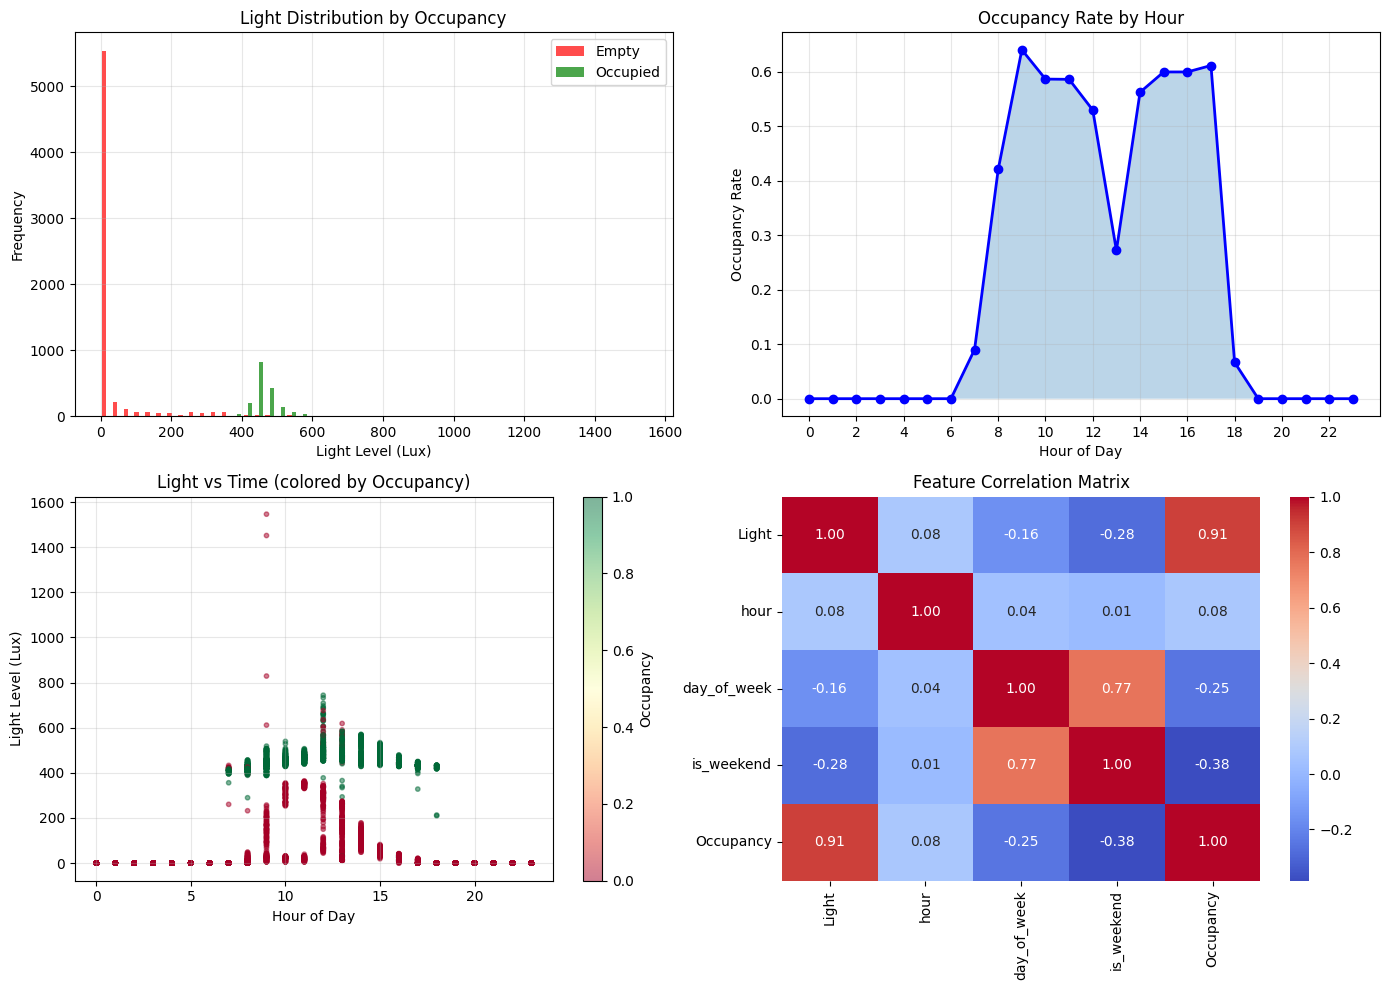

✓ All 4 charts created and displayed!
  Saved as: data_visualization.png


In [ ]:
print("[5/8] Creating data visualizations...")

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# CHART 1: Light Distribution by Occupancy
empty_light = df[df['Occupancy']==0]['Light']
occupied_light = df[df['Occupancy']==1]['Light']

axes[0, 0].hist([empty_light, occupied_light],
                label=['Empty', 'Occupied'],
                bins=50, alpha=0.7, color=['red', 'green'])
axes[0, 0].set_xlabel('Light Level (Lux)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Light Distribution by Occupancy')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# CHART 2: Hourly Occupancy Pattern
hourly_occ = df.groupby('hour')['Occupancy'].mean()

axes[0, 1].plot(hourly_occ.index, hourly_occ.values,
                marker='o', linewidth=2, color='blue')
axes[0, 1].fill_between(hourly_occ.index, hourly_occ.values, alpha=0.3)
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Occupancy Rate')
axes[0, 1].set_title('Occupancy Rate by Hour')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(0, 24, 2))

# CHART 3: Light vs Hour Scatter
scatter = axes[1, 0].scatter(df['hour'], df['Light'],
                             c=df['Occupancy'], cmap='RdYlGn',
                             alpha=0.5, s=10)
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Light Level (Lux)')
axes[1, 0].set_title('Light vs Time (colored by Occupancy)')
plt.colorbar(scatter, ax=axes[1, 0], label='Occupancy')
axes[1, 0].grid(alpha=0.3)

# CHART 4: Correlation Heatmap
corr_matrix = df[feature_columns + [target_column]].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f',
            cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

# Display and Save
plt.tight_layout()
plt.savefig('data_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ All 4 charts created and displayed!")
print("  Saved as: data_visualization.png")

In [ ]:
#TRAIN-TEST SPLIT & SCALING

In [ ]:
print("[6/8] Splitting data into training and testing sets...")

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

[6/8] Splitting data into training and testing sets...


In [ ]:
print(f"  Training set: {len(X_train):,} samples (80%)")
print(f"  Test set:     {len(X_test):,} samples (20%)")
print()

print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Features scaled!")
print()

  Training set: 6,514 samples (80%)
  Test set:     1,629 samples (20%)

Scaling features...
✓ Features scaled!



In [ ]:
#TRAIN MODELS

In [ ]:
print("[7/8] Training AI models...")
print()

# Initialize results dictionary FIRST
results = {}

[7/8] Training AI models...



In [ ]:
print("  [Model 1/3] Training Decision Tree...")

dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

  [Model 1/3] Training Decision Tree...


In [ ]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# STORE in results dictionary
results['Decision Tree'] = {
    'model': dt_model,
    'predictions': dt_pred,
    'accuracy': dt_accuracy,
    'f1_score': dt_f1,
    'size_estimate': '< 5 KB'
}

print(f"     ✓ Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"     ✓ F1-Score: {dt_f1:.4f}")
print()

     ✓ Accuracy: 0.9853 (98.53%)
     ✓ F1-Score: 0.9660



In [ ]:
# Initialize results dictionary
results = {}

# Store Decision Tree results
results['Decision Tree'] = {
    'model': dt_model,
    'predictions': dt_pred,
    'accuracy': dt_accuracy,
    'f1_score': dt_f1,
    'size_estimate': '< 5 KB'
}

print("✓ Decision Tree results stored in dictionary")

✓ Decision Tree results stored in dictionary


In [ ]:
#RANDOM FOREST

In [ ]:
print("  [Model 2/3] Training Random Forest...")

# Create Random Forest (50 decision trees voting together)
rf_model = RandomForestClassifier(
    n_estimators=50,       # Use 50 trees
    max_depth=5,           # Each tree max 5 levels deep
    min_samples_split=20,  # Split nodes with 20+ samples
    random_state=42
)

  [Model 2/3] Training Random Forest...


In [ ]:
# Train the forest
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate performance
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Store in results dictionary
results['Random Forest'] = {
    'model': rf_model,
    'predictions': rf_pred,
    'accuracy': rf_accuracy,
    'f1_score': rf_f1,
    'size_estimate': '~50 KB'
}

print(f"     ✓ Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"     ✓ F1-Score: {rf_f1:.4f}")
print(f"     ✓ Size: ~50 KB")
print()

     ✓ Accuracy: 0.9877 (98.77%)
     ✓ F1-Score: 0.9719
     ✓ Size: ~50 KB



In [ ]:
#NEURAL NETWORK

In [ ]:
print("  [Model 3/3] Training Neural Network...")

# Create Neural Network
nn_model = MLPClassifier(
    hidden_layer_sizes=(16, 8),  # 2 hidden layers: 16 neurons, then 8 neurons
    activation='relu',            # Activation function
    max_iter=500,                 # Train for max 500 iterations
    random_state=42
)

  [Model 3/3] Training Neural Network...


In [ ]:
# Train the network (needs scaled data!)
nn_model.fit(X_train_scaled, y_train)

# Make predictions (use scaled test data)
nn_pred = nn_model.predict(X_test_scaled)

# Calculate performance
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)

# Store in results dictionary
results['Neural Network'] = {
    'model': nn_model,
    'predictions': nn_pred,
    'accuracy': nn_accuracy,
    'f1_score': nn_f1,
    'size_estimate': '~10 KB'
}

print(f"     ✓ Accuracy: {nn_accuracy:.4f} ({nn_accuracy*100:.2f}%)")
print(f"     ✓ F1-Score: {nn_f1:.4f}")
print(f"     ✓ Size: ~10 KB")
print()

print("✓ All 3 models trained successfully!")
print()

     ✓ Accuracy: 0.9877 (98.77%)
     ✓ F1-Score: 0.9719
     ✓ Size: ~10 KB

✓ All 3 models trained successfully!



In [ ]:
#MODEL COMPARISON & VISUALIZATION

In [ ]:
print("[8/8] Comparing models and generating visualizations...")
print()

[8/8] Comparing models and generating visualizations...



In [ ]:
# Create comparison table
print("=" * 80)
print("                    MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(f"{'Model':<20} {'Accuracy':<15} {'F1-Score':<15} {'Size':<15}")
print("-" * 80)

for name, data in results.items():
    acc_pct = data['accuracy'] * 100
    print(f"{name:<20} {data['accuracy']:.4f} ({acc_pct:.2f}%)   {data['f1_score']:.4f}          {data['size_estimate']:<15}")

print("=" * 80)
print()

                    MODEL PERFORMANCE COMPARISON
Model                Accuracy        F1-Score        Size           
--------------------------------------------------------------------------------
Decision Tree        0.9853 (98.53%)   0.9660          < 5 KB         
Random Forest        0.9877 (98.77%)   0.9719          ~50 KB         
Neural Network       0.9877 (98.77%)   0.9719          ~10 KB         



In [ ]:
# Find best model (highest F1-score)
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_data = results[best_model_name]

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_data['accuracy']*100:.2f}%")
print(f"   F1-Score: {best_data['f1_score']:.4f}")
print(f"   Model Size: {best_data['size_estimate']}")
print()

🏆 BEST MODEL: Random Forest
   Accuracy: 98.77%
   F1-Score: 0.9719
   Model Size: ~50 KB



In [ ]:
#CONFUSION MATRICES

Creating confusion matrices...



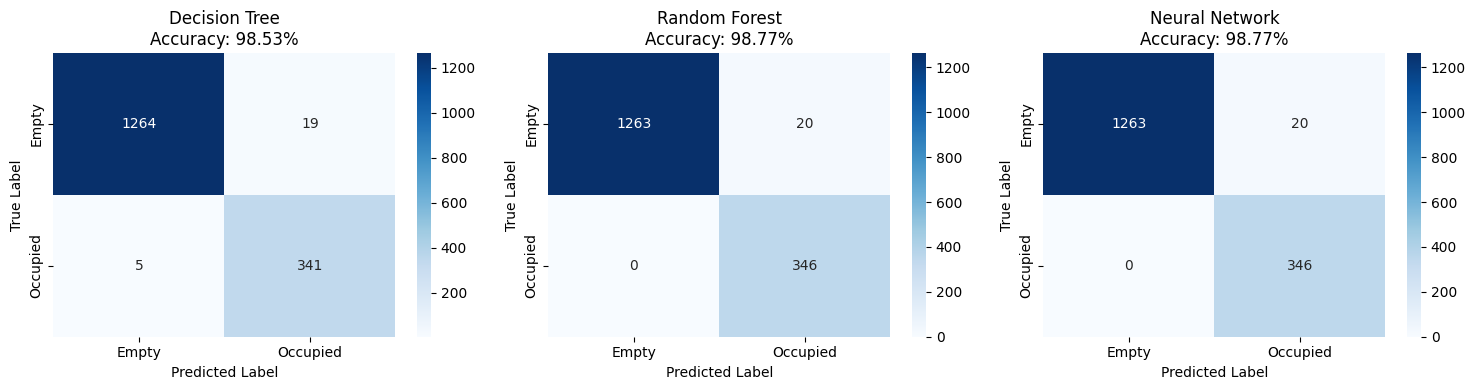

✓ Confusion matrices created!
  Saved as: confusion_matrices.png



In [ ]:
print("Creating confusion matrices...")
print()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, data) in enumerate(results.items()):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, data['predictions'])

    # Draw heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Empty', 'Occupied'],
                yticklabels=['Empty', 'Occupied'])

    axes[idx].set_title(f'{name}\nAccuracy: {data["accuracy"]:.2%}')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices created!")
print("  Saved as: confusion_matrices.png")
print()

In [ ]:
#DETAILED CLASSIFICATION REPORT

In [ ]:
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}:")
print("=" * 60)
print(classification_report(y_test, best_data['predictions'],
                          target_names=['Empty', 'Occupied']))
print()

DETAILED CLASSIFICATION REPORT - Random Forest:
              precision    recall  f1-score   support

       Empty       1.00      0.98      0.99      1283
    Occupied       0.95      1.00      0.97       346

    accuracy                           0.99      1629
   macro avg       0.97      0.99      0.98      1629
weighted avg       0.99      0.99      0.99      1629




In [ ]:
#FEATURE IMPORTANCE

FEATURE IMPORTANCE:
       Feature  Importance
0        Light    0.844129
1         hour    0.083142
3   is_weekend    0.044519
2  day_of_week    0.028211



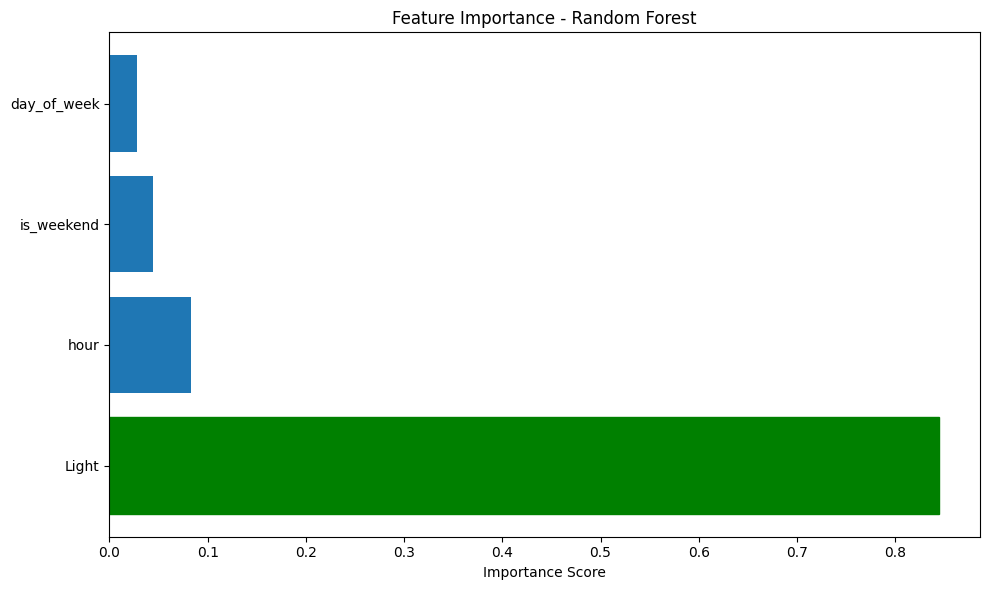

✓ Feature importance chart created!
  Saved as: feature_importance.png



In [ ]:
# Only tree-based models have feature importance
if 'Random Forest' in best_model_name or 'Decision Tree' in best_model_name:
    print("FEATURE IMPORTANCE:")
    print("=" * 60)

    # Get the best model
    best_model = results[best_model_name]['model']

    # Get feature importances
    importances = best_model.feature_importances_

    # Create DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(feature_importance_df)
    print()

    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(feature_importance_df['Feature'],
                    feature_importance_df['Importance'])
    bars[0].set_color('green')  # Highlight most important
    plt.xlabel('Importance Score')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("✓ Feature importance chart created!")
    print("  Saved as: feature_importance.png")
else:
    print("(Neural Network doesn't provide feature importance)")

print()

In [ ]:
# Find best model
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model_data = results[best_model_name]

In [ ]:
#THRESHOLDS FOR ESP32

In [ ]:
print("=" * 60)
print("KEY THRESHOLDS FOR ESP32 DEPLOYMENT")
print("=" * 60)
print()

# Calculate optimal light threshold
light_median_occupied = df[df['Occupancy']==1]['Light'].median()
light_median_empty = df[df['Occupancy']==0]['Light'].median()
light_threshold = (light_median_occupied + light_median_empty) / 2

print(f"Light Thresholds:")
print(f"  Median when EMPTY: {light_median_empty:.2f} Lux")
print(f"  Median when OCCUPIED: {light_median_occupied:.2f} Lux")
print(f"  Optimal Threshold: {light_threshold:.2f} Lux")
print()

print("Decision Rules for ESP32:")
print(f"  IF light > {light_threshold:.0f} Lux:")
print(f"     THEN predict OCCUPIED")
print(f"  ELSE:")
print(f"     THEN predict EMPTY")
print()

print("Time-based adjustments:")
print("  Work hours (9-17): Lower threshold (-20%)")
print("  Evening (18-22): Higher threshold (+10%)")
print("  Night (23-8): Much higher threshold (+30%)")
print()

KEY THRESHOLDS FOR ESP32 DEPLOYMENT

Light Thresholds:
  Median when EMPTY: 0.00 Lux
  Median when OCCUPIED: 454.00 Lux
  Optimal Threshold: 227.00 Lux

Decision Rules for ESP32:
  IF light > 227 Lux:
     THEN predict OCCUPIED
  ELSE:
     THEN predict EMPTY

Time-based adjustments:
  Work hours (9-17): Lower threshold (-20%)
  Evening (18-22): Higher threshold (+10%)
  Night (23-8): Much higher threshold (+30%)



In [ ]:
print("=" * 60)
print("✅ TRAINING COMPLETE!")
print("=" * 60)
print()
print("📊 Files generated:")
print("  ✓ data_visualization.png")
print("  ✓ confusion_matrices.png")
print("  ✓ feature_importance.png")
print()
print(f"🏆 Best Model: {best_model_name}")
print(f"   Expected ESP32 Accuracy: ~{best_model_data['accuracy']*100:.1f}%")
print(f"   Model Size: {best_model_data['size_estimate']}")
print()
print("=" * 60)
print("NEXT STEPS:")
print("=" * 60)
print()
print("🚀 READY FOR DEPLOYMENT!")
print("=" * 60)

✅ TRAINING COMPLETE!

📊 Files generated:
  ✓ data_visualization.png
  ✓ confusion_matrices.png
  ✓ feature_importance.png

🏆 Best Model: Random Forest
   Expected ESP32 Accuracy: ~98.8%
   Model Size: ~50 KB

NEXT STEPS:

🚀 READY FOR DEPLOYMENT!


In [ ]:
print("=" * 60)
print("CALCULATING OPTIMAL LIGHT THRESHOLD FOR ESP32")
print("=" * 60)
print()

# Calculate light statistics
light_median_empty = df[df['Occupancy']==0]['Light'].median()
light_median_occupied = df[df['Occupancy']==1]['Light'].median()
light_threshold = (light_median_occupied + light_median_empty) / 2

print("Light Level Statistics:")
print(f"  Median when EMPTY:    {light_median_empty:.2f} Lux")
print(f"  Median when OCCUPIED: {light_median_occupied:.2f} Lux")
print(f"  OPTIMAL THRESHOLD:    {light_threshold:.2f} Lux")
print()

print("Decision Rule for ESP32:")
print(f"  IF light > {light_threshold:.0f} Lux")
print(f"     → Predict OCCUPIED")
print(f"  ELSE")
print(f"     → Predict EMPTY")
print()

print("=" * 60)
print("✅ ML TRAINING COMPLETE!")
print("=" * 60)
print()
print(f"🏆 Best Model: {best_model_name}")
print(f"   Accuracy: {best_data['accuracy']*100:.2f}%")
print(f"   F1-Score: {best_data['f1_score']:.4f}")
print(f"   Size: {best_data['size_estimate']}")
print()
print("📊 Files Generated:")
print("  ✓ data_visualization.png")
print("  ✓ confusion_matrices.png")
print("  ✓ feature_importance.png")
print()
print(f"💡 Light Threshold for ESP32: {light_threshold:.0f} Lux")
print()
print("🚀 READY FOR ESP32 DEPLOYMENT!")
print("=" * 60)

CALCULATING OPTIMAL LIGHT THRESHOLD FOR ESP32

Light Level Statistics:
  Median when EMPTY:    0.00 Lux
  Median when OCCUPIED: 454.00 Lux
  OPTIMAL THRESHOLD:    227.00 Lux

Decision Rule for ESP32:
  IF light > 227 Lux
     → Predict OCCUPIED
  ELSE
     → Predict EMPTY

✅ ML TRAINING COMPLETE!

🏆 Best Model: Random Forest
   Accuracy: 98.77%
   F1-Score: 0.9719
   Size: ~50 KB

📊 Files Generated:
  ✓ data_visualization.png
  ✓ confusion_matrices.png
  ✓ feature_importance.png

💡 Light Threshold for ESP32: 227 Lux

🚀 READY FOR ESP32 DEPLOYMENT!
